<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning :
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [ ]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/15_scenes_Xy.npz

--2022-10-14 14:18:11--  https://github.com/rdfia/rdfia.github.io/raw/master/data/15_scenes_Xy.npz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/15_scenes_Xy.npz [following]
--2022-10-14 14:18:11--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/15_scenes_Xy.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [application/octet-stream]
Saving to: ‘15_scenes_Xy.npz.5’

15_scenes_Xy.npz.5  100%[===================>]  34.29M   184MB/s    in 0.2s    

2022-10-14 14:18:11 (184 MB/s) - ‘15_scenes_Xy.npz.5’ saved [35952210/35952210

In [ ]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [ ]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [ ]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
print(len(xtrain))
print(len(xtest))
print(len(X))


3588
897
4485


Then a validation set from the train set:

In [ ]:
newxtrain, xvalidation, newytrain, yvalidation = train_test_split(xtrain, ytrain, test_size=0.125)
print(len(newxtrain))
print(len(xvalidation))
print(len(xtrain))



3139
449
3588


In [ ]:
subtrainx, subvalx, subtrainy, subvaly = train_test_split(newxtrain, newytrain, train_size=500, test_size=100)

Let's hyperparameter gridsearch over different values of `C`:

In [ ]:
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
accuracies = []


for c in C_values:
  print(f'Training SVM with C={c}')
  #TODO
  svm = SVC(C=c)

  # Fit on sub-train set
  svm.fit(subtrainx, subtrainy)
  print("Finished fit")

  # Evaluate on val set
  result = svm.score(subvalx, subvaly)
  print("For ", c, " acc: ", result)
  accuracies.append(result)
  #print(f'--> accuracy = {acc}')

Training SVM with C=1e-05
Finished fit
For  1e-05  acc:  0.09
Training SVM with C=0.0001
Finished fit
For  0.0001  acc:  0.09
Training SVM with C=0.001
Finished fit
For  0.001  acc:  0.09
Training SVM with C=0.01
Finished fit
For  0.01  acc:  0.09
Training SVM with C=0.1
Finished fit
For  0.1  acc:  0.15
Training SVM with C=1
Finished fit
For  1  acc:  0.2
Training SVM with C=10
Finished fit
For  10  acc:  0.6
Training SVM with C=100
Finished fit
For  100  acc:  0.7
Training SVM with C=1000
Finished fit
For  1000  acc:  0.7
Training SVM with C=10000
Finished fit
For  10000  acc:  0.7
Training SVM with C=100000
Finished fit
For  100000  acc:  0.7


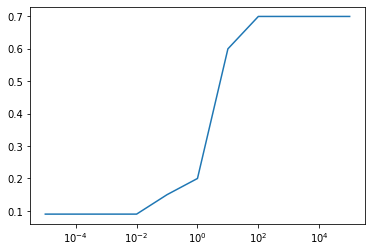

In [ ]:
#TODO plot the relation between `c` and the accuracy
plt.plot(C_values, accuracies)
plt.xscale("log")
plt.show()

In [ ]:
C_values = range(1, 110, 10)
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')
  #TODO
  svm = SVC(C=c)

  # Fit on sub-train set
  svm.fit(subtrainx, subtrainy)
  print("Finished fit")

  # Evaluate on val set
  result = svm.score(subvalx, subvaly)
  print("For ", c, " acc: ", result)
  accuracies.append(result)
  #print(f'--> accuracy = {acc}')

Training SVM with C=1
Finished fit
For  1  acc:  0.2
Training SVM with C=11
Finished fit
For  11  acc:  0.61
Training SVM with C=21
Finished fit
For  21  acc:  0.66
Training SVM with C=31
Finished fit
For  31  acc:  0.67
Training SVM with C=41
Finished fit
For  41  acc:  0.7
Training SVM with C=51
Finished fit
For  51  acc:  0.7
Training SVM with C=61
Finished fit
For  61  acc:  0.7
Training SVM with C=71
Finished fit
For  71  acc:  0.7
Training SVM with C=81
Finished fit
For  81  acc:  0.7
Training SVM with C=91
Finished fit
For  91  acc:  0.7
Training SVM with C=101
Finished fit
For  101  acc:  0.7


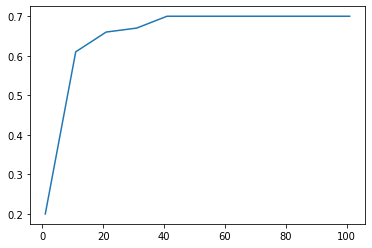

In [ ]:
#TODO plot the relation between `c` and the accuracy
plt.plot(C_values, accuracies)
plt.show()

In [ ]:
#TODO Fit on the whole train set, evaluate on the test set
svm = SVC(C=1)
svm.fit(newxtrain, newytrain)
svm.score(xtest, ytest)

0.5027870680044593

Do the same with different kernel values, and different decision functions:

Training SVM with Kernel=linear
Finished fit
For  101  acc:  0.77
Training SVM with Kernel=poly
Finished fit
For  101  acc:  0.53
Training SVM with Kernel=rbf
Finished fit
For  101  acc:  0.7
Training SVM with Kernel=sigmoid
Finished fit
For  101  acc:  0.1


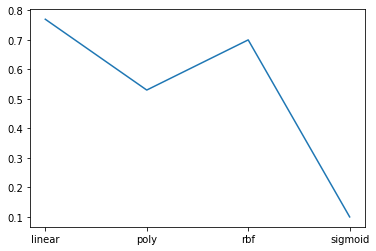

In [ ]:
# Hyperparameter Kernel
kernel_values = ["linear", "poly", "rbf", "sigmoid"]
accuracies = []

for kernel in kernel_values:
  print(f'Training SVM with Kernel={kernel}')
  #TODO
  svm = SVC(kernel=kernel, C=100)

  # Fit on sub-train set
  svm.fit(subtrainx, subtrainy)
  print("Finished fit")

  # Evaluate on val set
  result = svm.score(subvalx, subvaly)
  print("For ", c, " acc: ", result)
  accuracies.append(result)
  #print(f'--> accuracy = {acc}')

plt.plot(kernel_values, accuracies)
plt.show()


Training SVM with Dec Func=ovo
Finished fit
For  101  acc:  0.7
Training SVM with Dec Func=ovr
Finished fit
For  101  acc:  0.7


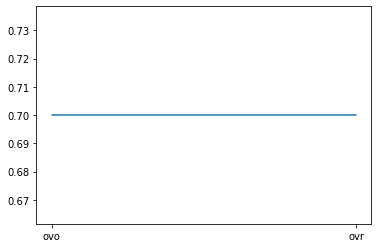

In [ ]:
# Hyperparameter Decision Function
func_values = ["ovo", "ovr"]
accuracies = []

for func in func_values:
  print(f'Training SVM with Dec Func={func}')
  #TODO
  svm = SVC(decision_function_shape=func, C=100)

  # Fit on sub-train set
  svm.fit(subtrainx, subtrainy)
  print("Finished fit")

  # Evaluate on val set
  result = svm.score(subvalx, subvaly)
  print("For ", c, " acc: ", result)
  accuracies.append(result)
  #print(f'--> accuracy = {acc}')

plt.plot(func_values, accuracies)
plt.show()

Training SVM with degree=1
Finished fit
For  101  acc:  0.21
Training SVM with degree=2
Finished fit
For  101  acc:  0.21
Training SVM with degree=3
Finished fit
For  101  acc:  0.25
Training SVM with degree=4
Finished fit
For  101  acc:  0.25
Training SVM with degree=5
Finished fit
For  101  acc:  0.23
Training SVM with degree=6
Finished fit
For  101  acc:  0.26
Training SVM with degree=7
Finished fit
For  101  acc:  0.28
Training SVM with degree=8
Finished fit
For  101  acc:  0.28
Training SVM with degree=9
Finished fit
For  101  acc:  0.27
Training SVM with degree=10
Finished fit
For  101  acc:  0.28


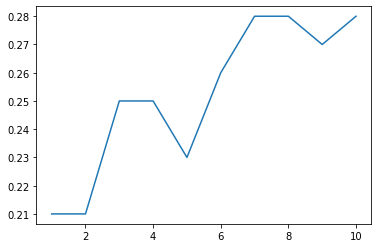

In [ ]:
#Hyperparameter Degree (for polynomial kernel)
degrees = range(1, 11)
accuracies = []

for degree in degrees:
  print(f'Training SVM with degree={degree}')
  #TODO
  svm = SVC(kernel="poly", degree=degree, C=100)

  # Fit on sub-train set
  svm.fit(subtrainx, subtrainy)
  print("Finished fit")

  # Evaluate on val set
  result = svm.score(subvalx, subvaly)
  print("For ", c, " acc: ", result)
  accuracies.append(result)
  #print(f'--> accuracy = {acc}')
plt.plot(degrees, accuracies)
plt.show()